In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

Text(0, 0.5, 'Acc X')

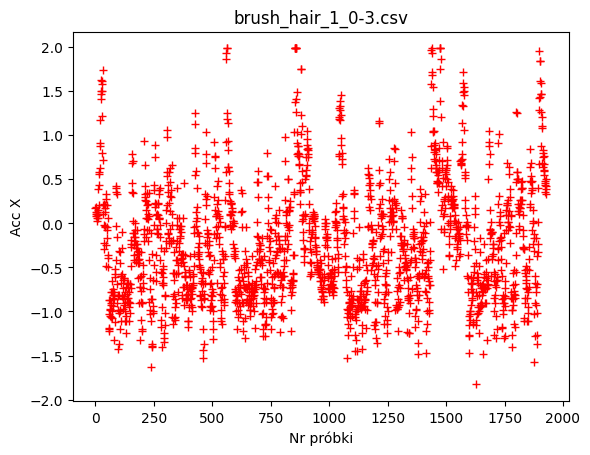

In [2]:
df0 = pd.read_csv('brush_hair_1_0.csv', names=['Acc_X', 'Acc_Y', 'Acc_Z'])
df0.Acc_X /= 64
df0.Acc_Y /= 64
df0.Acc_Z /= 64

df1 = pd.read_csv('brush_hair_1_1.csv', names=['Acc_X', 'Acc_Y', 'Acc_Z'])
df1.Acc_X /= 64
df1.Acc_Y /= 64
df1.Acc_Z /= 64

df2 = pd.read_csv('brush_hair_1_2.csv', names=['Acc_X', 'Acc_Y', 'Acc_Z'])
df2.Acc_X /= 64
df2.Acc_Y /= 64
df2.Acc_Z /= 64

df3 = pd.read_csv('brush_hair_1_3.csv', names=['Acc_X', 'Acc_Y', 'Acc_Z'])
df3.Acc_X /= 64
df3.Acc_Y /= 64
df3.Acc_Z /= 64

dfTrain = pd.concat([df0, df1, df2, df3], ignore_index=True)

plt.figure()
plt.plot(dfTrain.Acc_X, 'r+')
plt.title('brush_hair_1_0-3.csv')
plt.xlabel('Nr próbki')
plt.ylabel('Acc X')

Text(0, 0.5, 'Acc X')

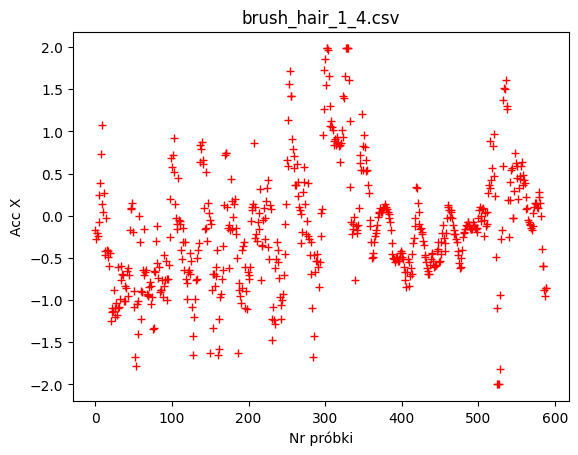

In [3]:
df4 = pd.read_csv('brush_hair_1_4.csv', names=['Acc_X', 'Acc_Y', 'Acc_Z'])
df4.Acc_X /= 64
df4.Acc_Y /= 64
df4.Acc_Z /= 64

dfTest = df4

plt.figure()
plt.plot(dfTest.Acc_X, 'r+')
plt.title('brush_hair_1_4.csv')
plt.xlabel('Nr próbki')
plt.ylabel('Acc X')

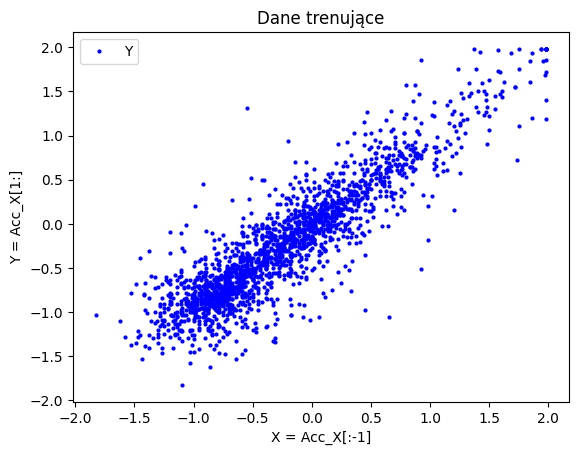

In [4]:
tmp = dfTrain.Acc_X.to_numpy()

X = tmp[0:len(tmp)-1]
Y = tmp[1:len(tmp)]

plt.figure()
plt.plot(X, Y, 'bo', label='Y', markersize=2)
plt.title('Dane trenujące')
plt.xlabel('X = Acc_X[:-1]')
plt.ylabel('Y = Acc_X[1:]')
plt.legend(['Y'])

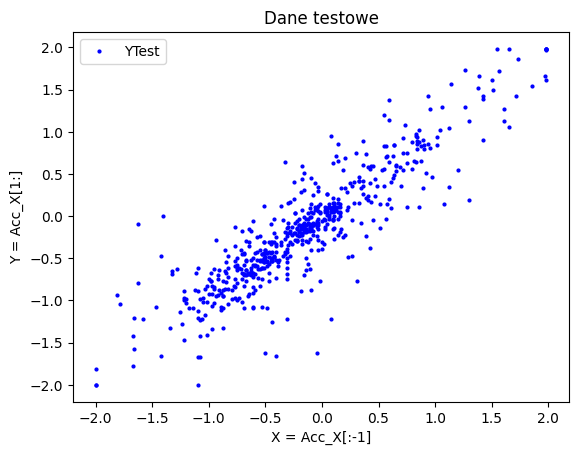

In [5]:
tmp = dfTest.Acc_X.to_numpy()

XTest = tmp[0:len(tmp)-1]
YTest = tmp[1:len(tmp)]

plt.figure()
plt.plot(XTest, YTest, 'bo', label='YTest', markersize=2)
plt.title('Dane testowe')
plt.xlabel('X = Acc_X[:-1]')
plt.ylabel('Y = Acc_X[1:]')
plt.legend(['YTest'])

In [14]:
def make_neural_network(first_layer=5, second_layer=5, first_func='tanh', second_func='tanh',):
    model = Sequential()
    model.add(Input(shape=(1,)))
    model.add(Dense(first_layer, activation=first_func))
    model.add(Dense(second_layer, activation=second_func))
    model.add(Dense(1, activation='linear'))
    return model

model_tanh = make_neural_network(5, 5, 'tanh', 'tanh')
model_relu = make_neural_network(5, 5, 'relu', 'relu')
model_sigmoid = make_neural_network(5, 5, 'sigmoid', 'sigmoid')

In [17]:
optim_t = Adam(learning_rate=0.01,
             beta_1=0.9,
             beta_2=0.999,
             epsilon=1e-07)
optim_r = Adam(learning_rate=0.01,
             beta_1=0.9,
             beta_2=0.999,
             epsilon=1e-07)
optim_s = Adam(learning_rate=0.01,
             beta_1=0.9,
             beta_2=0.999,
             epsilon=1e-07)
model_tanh.compile(optimizer=optim_t, loss='mean_squared_error', metrics=['mean_squared_error'])
model_relu.compile(optimizer=optim_r, loss='mean_squared_error', metrics=['mean_squared_error'])
model_sigmoid.compile(optimizer=optim_s, loss='mean_squared_error', metrics=['mean_squared_error'])

model = [model_tanh, model_relu, model_sigmoid]

In [18]:
hist_tanh = model_tanh.fit(X, Y, epochs=50, verbose=1, batch_size=100, validation_split=0.05)
hist_relu = model_relu.fit(X, Y, epochs=50, verbose=1, batch_size=100, validation_split=0.05)
hist_sigmoid = model_sigmoid.fit(X, Y, epochs=50, verbose=1, batch_size=100, validation_split=0.05)

hist = [hist_tanh, hist_relu, hist_sigmoid]

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.0828 - val_mean_squared_error: 0.0828
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0817 - mean_squared_error: 0.0817 - val_loss: 0.0799 - val_mean_squared_error: 0.0799
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0852 - mean_squared_error: 0.0852 - val_loss: 0.0787 - val_mean_squared_error: 0.0787
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0879 - mean_squared_error: 0.0879 - val_loss: 0.0777 - val_mean_squared_error: 0.0777
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0870 - mean_squared_error: 0.0870 - val_loss: 0.0765 - val_mean_squared_error: 0.0765
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.0778 - val_mean_squared_error: 0.0778
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0919 - mean_squared_error: 0.0919 - val_loss: 0.0761 - val_mean

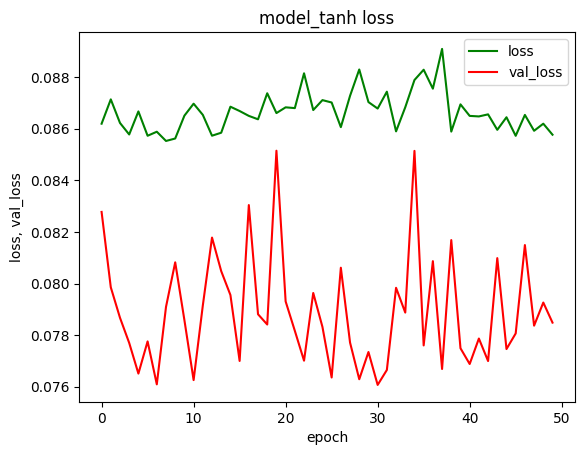

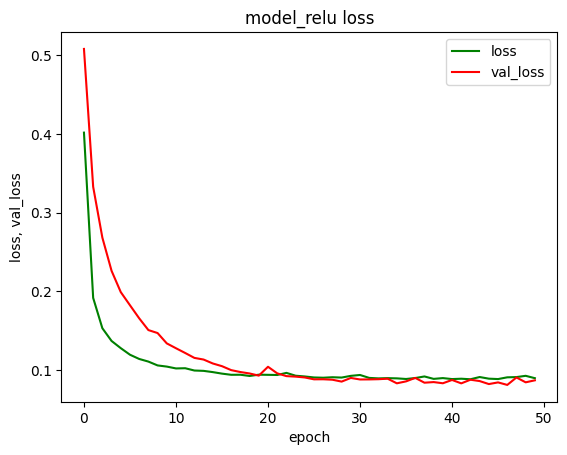

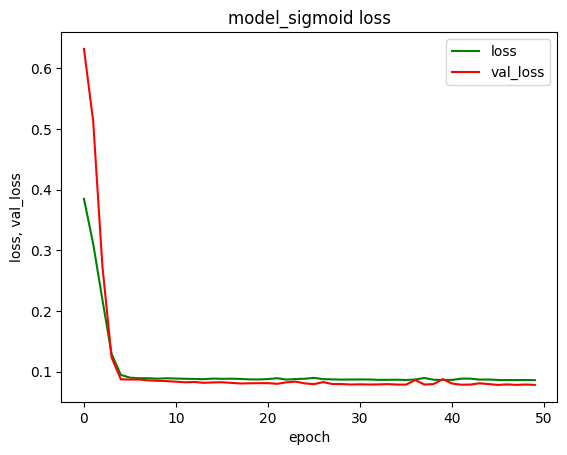

In [19]:
for hist in hist:
    plt.figure()
    plt.plot(hist.history['loss'], '-g', label='loss')
    plt.plot(hist.history['val_loss'], '-r', label='val_loss')
    plt.title('model_tanh loss') if hist == hist_tanh else None
    plt.title('model_relu loss') if hist == hist_relu else None
    plt.title('model_sigmoid loss') if hist == hist_sigmoid else None
    plt.ylabel('loss, val_loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'])

In [21]:
YTestPred = [model.predict(XTest) for model in model]

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


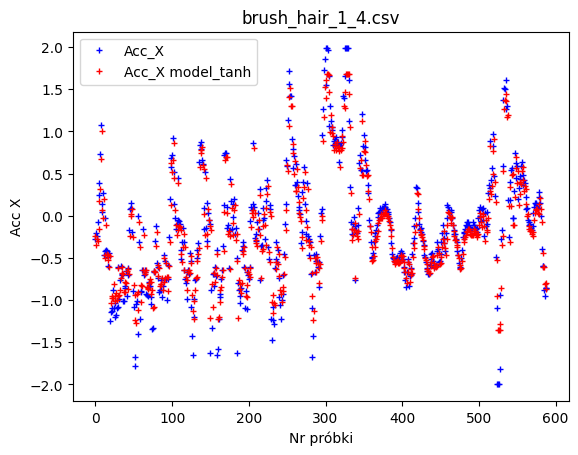

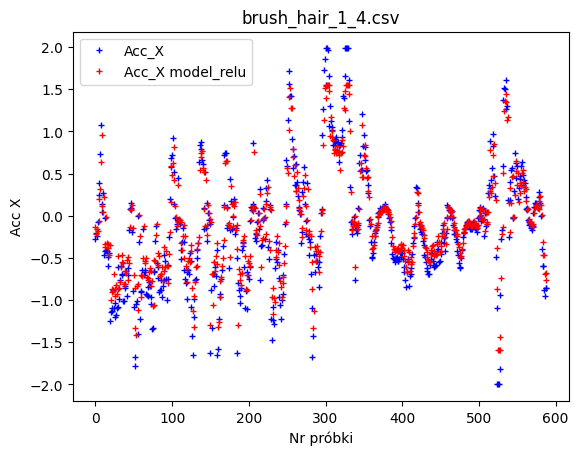

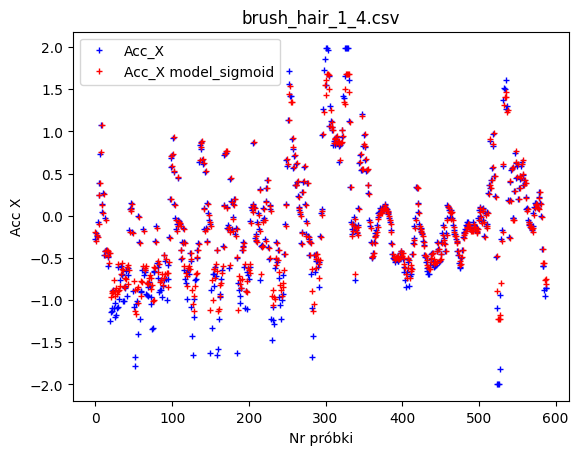

In [22]:
for idx, ypred in enumerate(YTestPred):
    plt.figure()
    plt.plot(YTest, 'b+', label='Y', markersize=4)
    plt.plot(ypred, 'r+', label='YPred', markersize=4)
    plt.xlabel('Nr próbki')
    plt.ylabel('Acc X')
    plt.title('brush_hair_1_4.csv')
    plt.legend(['Acc_X', 'Acc_X model_tanh']) if idx == 0 else None
    plt.legend(['Acc_X', 'Acc_X model_relu']) if idx == 1 else None
    plt.legend(['Acc_X', 'Acc_X model_sigmoid']) if idx == 2 else None

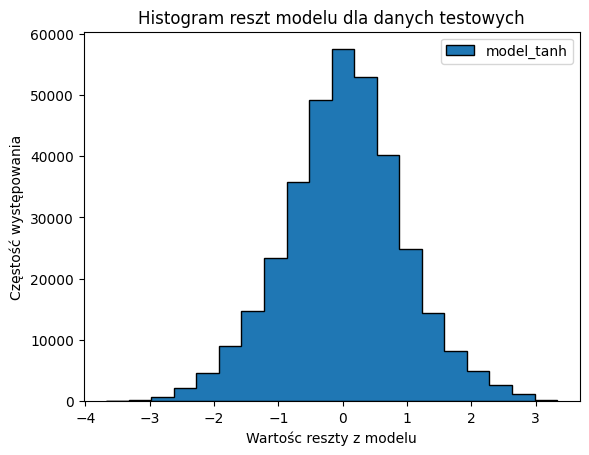

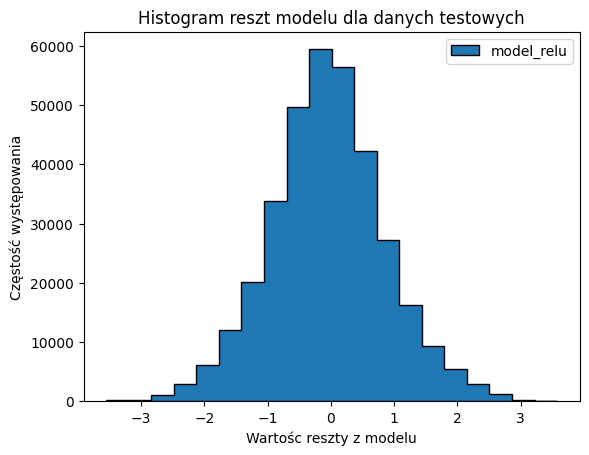

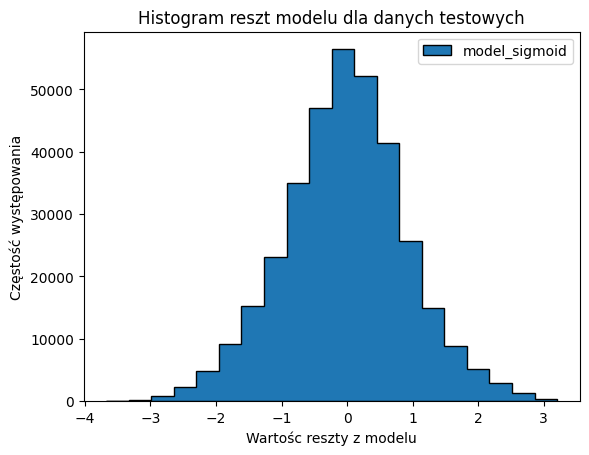

In [23]:
residuals_t = YTest - YTestPred[0]
residuals_r = YTest - YTestPred[1]
residuals_s = YTest - YTestPred[2]

residuals = [residuals_t, residuals_r, residuals_s]

counts_t, bins_t = np.histogram(residuals_t, bins=20)
counts_r, bins_r = np.histogram(residuals_r, bins=20)
counts_s, bins_s = np.histogram(residuals_s, bins=20)

counts = [counts_t, counts_r, counts_s]
bins = [bins_t, bins_r, bins_s]

for i in range(len(residuals)):
    plt.figure()
    plt.hist(bins[i][:-1], bins[i], weights=counts[i], edgecolor='black', linewidth=1, histtype='stepfilled', rwidth=0.8)
    plt.title('Histogram reszt modelu dla danych testowych')
    plt.xlabel('Wartośc reszty z modelu')
    plt.ylabel('Częstość występowania')
    plt.legend(['model_tanh']) if i == 0 else None
    plt.legend(['model_relu']) if i == 1 else None
    plt.legend(['model_sigmoid']) if i == 2 else None
    plt.show()

In [ ]:
def mape(yreal, ypred):
    return float(100/len(yreal) * np.sum(np.abs((yreal - ypred) / yreal)))


def mmape(yreal, ypred):
    return float(100/len(yreal) * np.sum(np.abs((yreal - ypred) / (np.max(yreal)-np.min(yreal)))))


def rmse(yreal, ypred):
    return np.sum(np.sqrt((np.sum((yreal - ypred) ** 2))/len(yreal)))/len(yreal)

def nrmse(yreal, ypred):
    return np.sum(np.sqrt((np.sum((yreal - ypred) ** 2))/len(yreal))/np.std(yreal))/len(yreal)

mape = mape(YTest, YTestPred)
mmape = mmape(YTest, YTestPred)
rmse = rmse(YTest, YTestPred)
nrmsd = nrmse(YTest, YTestPred)

print(f'MAPE: {mape}')
print(f'MMAPE: {mmape}')
print(f'RMSE: {rmse}')
print(f'NRMSE: {nrmsd}')